In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cheating_dataset.csv')

In [3]:
df

,Unnamed: 0,positions,times,timeleft,elo,target,volatility_scores
0,0,[ 71776119061217280 4755801206503243776 25940...,0,90,2131,1,0.000132
1,1,[ 70650236334243840 4755801206503243776 25940...,0,90,2131,1,0.018800
2,2,[ 70650236334243840 4611690416473899008 25940...,1,89,2131,1,0.012499
3,3,[ 68398470880296960 4611690416473899008 25940...,1,88,2131,1,0.004468
4,4,[ 68398436520558592 4611690416473899008 25940...,0,88,2131,1,-0.000259
...,...,...,...,...,...,...,...
190865,190865,[ 160563141279744 70368744177664 ...,1,70,1585,0,0.035799
190866,190866,[ 142970955235328 70368744177664 ...,2,68,1585,0,0.023246
190867,190867,[ 142936595496960 70368744177664 ...,1,67,1585,0,0.018048
190868,190868,[ 142936528388096 536870912 ...,1,66,1585,0,0.014732


In [4]:
# let's add some additional columns to make things more interesting!
import numpy as np

def bitboards_to_array(bb: np.ndarray) -> np.ndarray:
    bb = np.asarray(bb, dtype=np.uint64)[:, np.newaxis]
    s = 8 * np.arange(7, -1, -1, dtype=np.uint64)
    b = (bb >> s).astype(np.uint8)
    b = np.unpackbits(b, bitorder="little")
    return b.reshape(-1, 8, 8)

In [5]:
def convert_str_to_board(position):
    tmp = position.replace("\n", "").replace("[", "").replace("]", "").split(" ")
    actual = []
    for a in tmp:
        if a.isdigit():
            actual.append(int(a))
    assert len(actual) == 12
    
    # now, we want to get positional information.
    board_number = bitboards_to_array(actual).sum(axis=(1, 2))
    board_number = np.delete(board_number, [5, 11])
    
    piece_values = [1,3,3,5,9,1,3,3,5,9]
    # Calculate the dot product between new_sums and piece_values
    dot_product = np.dot(board_number, piece_values)

    # Create a new array with new_sums and the dot product as the 11th element
    final_array = np.append(board_number, dot_product)

    return final_array

In [7]:
# Create a list to store the 11-length arrays for each position
array_list = []

# Iterate over the 'positions' column in the DataFrame
i = 0
for position in df['positions']:
    # Convert the position string to a board (11-length array)
    board_array = convert_str_to_board(position)
    
    # Append the board array to the list
    array_list.append(board_array)
    if i % 5000 == 0:
        print(f"{i} samples seen.")
    i += 1

# Create a new DataFrame from the list of arrays
new_df = pd.DataFrame(array_list, index=df.index)

# Assign new column names to the new DataFrame
column_names = ['wpawns', 'wknights', 'wbishops', 'wrooks', 'wqueens',
                'bpawns', 'bknights', 'bbishops', 'brooks', 'bqueens',
                'piecevalues']
new_df.columns = column_names

# Concatenate the original DataFrame and the new DataFrame
combined_df = pd.concat([df, new_df], axis=1)

print(combined_df.head())

0 samples seen.
5000 samples seen.
10000 samples seen.
15000 samples seen.
20000 samples seen.
25000 samples seen.
30000 samples seen.
35000 samples seen.
40000 samples seen.
45000 samples seen.
50000 samples seen.
55000 samples seen.
60000 samples seen.
65000 samples seen.
70000 samples seen.
75000 samples seen.
80000 samples seen.
85000 samples seen.
90000 samples seen.
95000 samples seen.
100000 samples seen.
105000 samples seen.
110000 samples seen.
115000 samples seen.
120000 samples seen.
125000 samples seen.
130000 samples seen.
135000 samples seen.
140000 samples seen.
145000 samples seen.
150000 samples seen.
155000 samples seen.
160000 samples seen.
165000 samples seen.
170000 samples seen.
175000 samples seen.
180000 samples seen.
185000 samples seen.
190000 samples seen.
   Unnamed: 0                                          positions  times  \
0           0  [  71776119061217280 4755801206503243776 25940...      0   
1           1  [  70650236334243840 4755801206503243776 

In [8]:
combined_df

,Unnamed: 0,positions,times,timeleft,elo,target,volatility_scores,wpawns,wknights,wbishops,wrooks,wqueens,bpawns,bknights,bbishops,brooks,bqueens,piecevalues
0,0,[ 71776119061217280 4755801206503243776 25940...,0,90,2131,1,0.000132,8.0,2.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,1.0,78.0
1,1,[ 70650236334243840 4755801206503243776 25940...,0,90,2131,1,0.018800,8.0,2.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,1.0,78.0
2,2,[ 70650236334243840 4611690416473899008 25940...,1,89,2131,1,0.012499,8.0,2.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,1.0,78.0
3,3,[ 68398470880296960 4611690416473899008 25940...,1,88,2131,1,0.004468,8.0,2.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,1.0,78.0
4,4,[ 68398436520558592 4611690416473899008 25940...,0,88,2131,1,-0.000259,7.0,2.0,2.0,2.0,1.0,7.0,2.0,2.0,2.0,1.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190865,190865,[ 160563141279744 70368744177664 ...,1,70,1585,0,0.035799,6.0,1.0,0.0,1.0,0.0,6.0,1.0,0.0,1.0,1.0,37.0
190866,190866,[ 142970955235328 70368744177664 ...,2,68,1585,0,0.023246,5.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,1.0,1.0,33.0
190867,190867,[ 142936595496960 70368744177664 ...,1,67,1585,0,0.018048,4.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,1.0,1.0,32.0
190868,190868,[ 142936528388096 536870912 ...,1,66,1585,0,0.014732,3.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0,1.0,1.0,31.0


In [9]:
# combined_df['elo_buckets'] = 
midpoint = lambda x: (x.left+x.right)/2

combined_df['elo_buckets'] = pd.qcut(combined_df['elo'], 10).apply(midpoint)

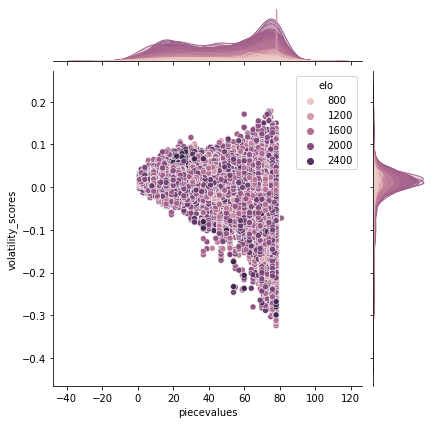

In [82]:
import seaborn as sns 

sns.jointplot(x=combined_df['piecevalues'], y=combined_df['volatility_scores'], hue=combined_df['elo'])

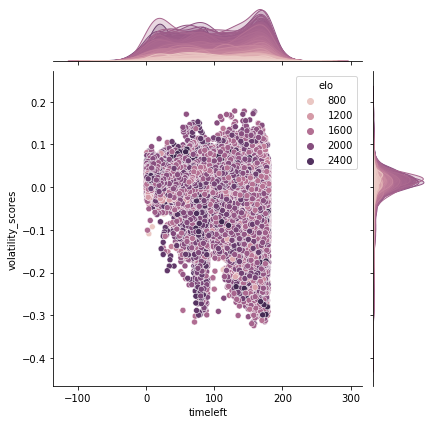

In [103]:
import seaborn as sns 

sns.jointplot(x=combined_df['timeleft'], y=combined_df['volatility_scores'], hue=combined_df['elo'])

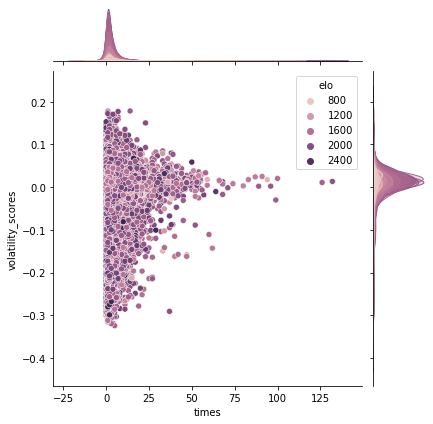

In [104]:
sns.jointplot(x=combined_df['times'], y=combined_df['volatility_scores'], hue=combined_df['elo'])

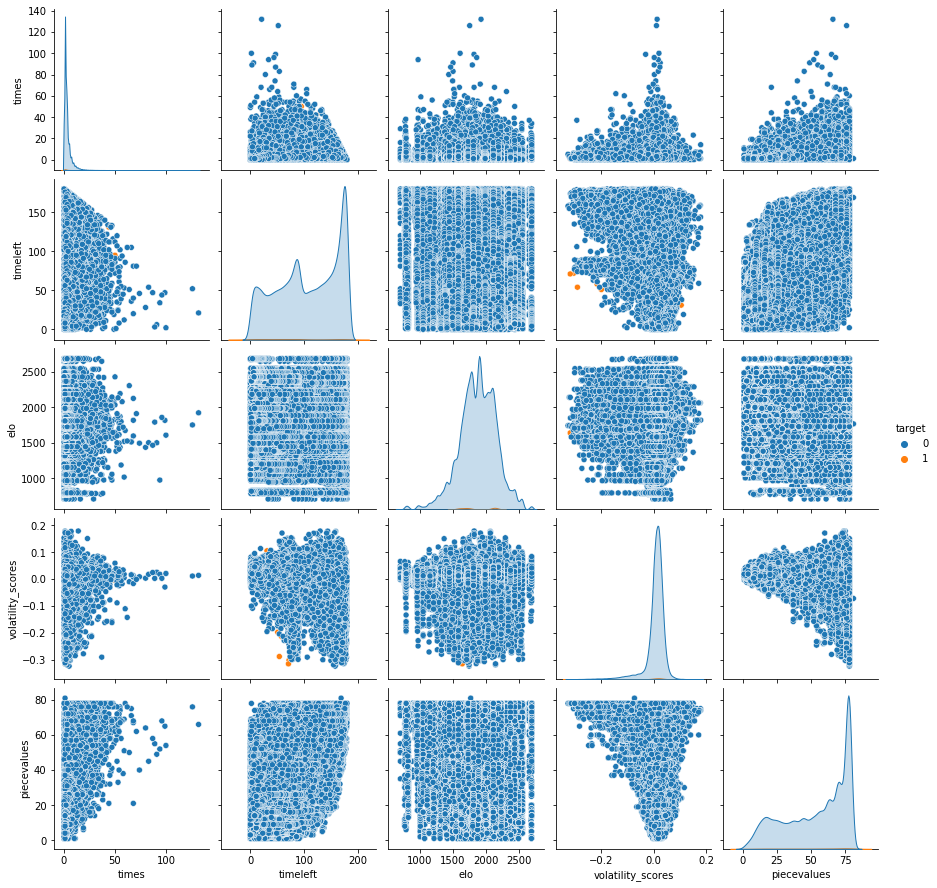

In [111]:
sns.pairplot(combined_df[["times", "timeleft", "elo", "volatility_scores", "piecevalues", "target"]], hue='target')

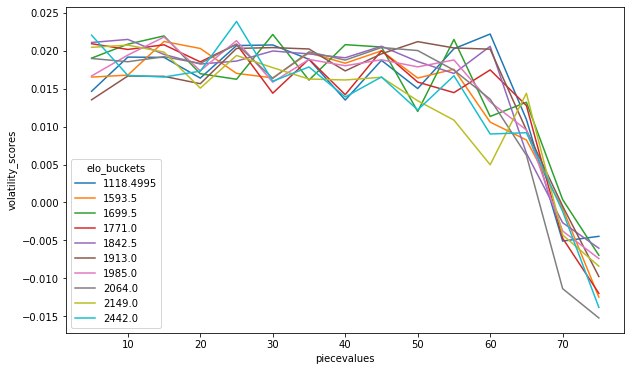

In [96]:
# Calculate the mean volatility scores for each piece value and Elo bucket
pivot_data = combined_df.pivot_table(index=['elo_buckets', 'piecevalues'],
                                     values='volatility_scores',
                                     aggfunc='mean').reset_index()
pivot_data = pivot_data[pivot_data['piecevalues'] % 5 == 0]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the line plot
sns.lineplot(x='piecevalues', y='volatility_scores', hue='elo_buckets', data=pivot_data, ax=ax)

In [86]:
grouped

,elo_buckets,piecevalues,volatility_scores
0,1118.4995,55.858756,0.007007
1,1593.5000,56.025846,0.005072
2,1699.5000,53.393047,0.005345
3,1771.0000,53.121601,0.006258
4,1842.5000,52.701508,0.007488
5,1913.0000,53.722468,0.006362
6,1985.0000,53.748726,0.006336
7,2064.0000,52.077213,0.004814
8,2149.0000,52.749085,0.005561
9,2442.0000,52.404372,0.005263


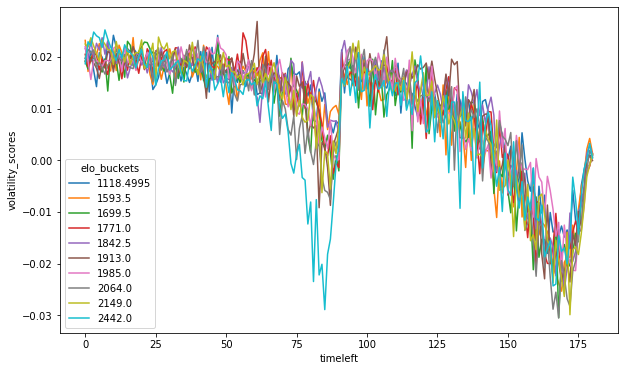

In [100]:
# Calculate the mean volatility scores for each piece value and Elo bucket
pivot_data = combined_df.pivot_table(index=['elo_buckets', 'timeleft'],
                                     values='volatility_scores',
                                     aggfunc='mean').reset_index()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the line plot
sns.lineplot(x='timeleft', y='volatility_scores', hue='elo_buckets', data=pivot_data, ax=ax)

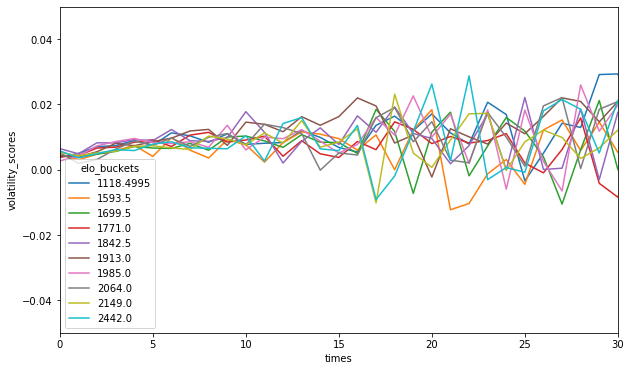

In [106]:
# Calculate the mean volatility scores for each piece value and Elo bucket
pivot_data = combined_df.pivot_table(index=['elo_buckets', 'times'],
                                     values='volatility_scores',
                                     aggfunc='mean').reset_index()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 30)
ax.set_ylim(-0.05, 0.05)
# Plot the line plot
sns.lineplot(x='times', y='volatility_scores', hue='elo_buckets', data=pivot_data, ax=ax)

In [10]:
import copy

training_data = copy.deepcopy(combined_df)

/Users/gsychi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


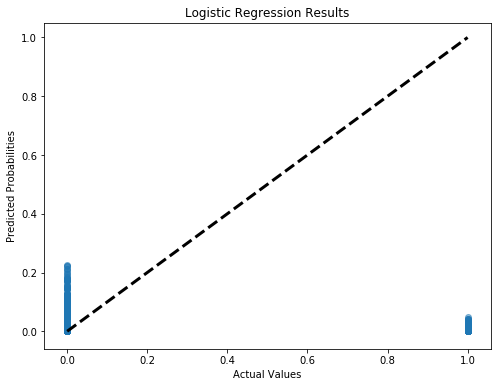

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = training_data.drop(['target', 'positions','Unnamed: 0'], axis=1)
y = training_data['target']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Plot the predicted probabilities against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Probabilities')
plt.title('Logistic Regression Results')
plt.show()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.0401138
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.027865
[3]	valid_0's binary_logloss: 0.024937
[4]	valid_0's binary_logloss: 0.0233325
[5]	valid_0's binary_logloss: 0.0218221
[6]	valid_0's binary_logloss: 0.020516
[7]	valid_0's binary_logloss: 0.019377
[8]	valid_0's binary_logloss: 0.0184544
[9]	valid_0's binary_logloss: 0.0175818
[10]	valid_0's binary_logloss: 0.0168424
[11]	valid_0's binary_logloss: 0.0159838
[12]	valid_0's binary_logloss: 0.0154581
[13]	valid_0's binary_logloss: 0.0149354
[14]	valid_0's binary_logloss: 0.0145636
[15]	valid_0's binary_logloss: 0.0141516
[16]	valid_0's binary_logloss: 0.0137399
[17]	valid_0's binary_logloss: 0.0134178
[18]	valid_0's binary_loglo

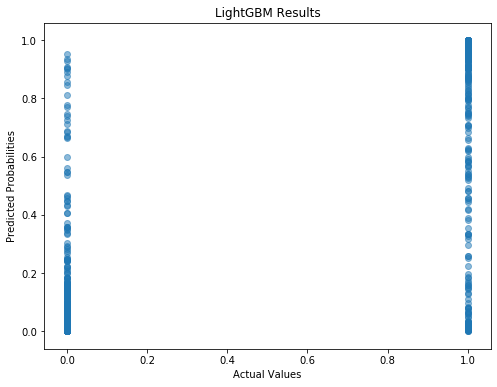

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Separate the target variable from the features
X = training_data.drop(['target', 'positions', 'Unnamed: 0', 'elo_buckets'], axis=1)
y = training_data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Create and fit the LightGBM model
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 100,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

model = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_test, early_stopping_rounds=5)

# Make predictions on the test set
y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)

# Plot the predicted probabilities against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Probabilities')
plt.title('LightGBM Results')
plt.show()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


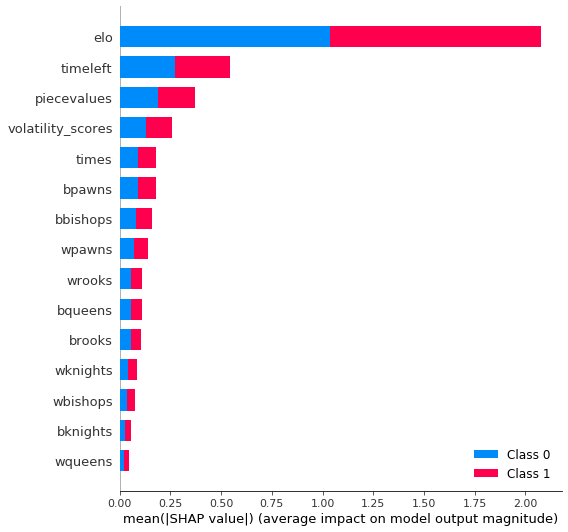

In [42]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [43]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on the test set
y_pred = model.predict(X_test)

sorted_indices = np.argsort(-y_pred_proba)
sorted_pred = y_pred[sorted_indices]

def p_top_k(k):
    ptopk = np.array(y_test)[sorted_indices[:k]]
    print(f"Precision @ top {k}: {sum(ptopk)/k}")
    
p_top_k(50)
p_top_k(100)
p_top_k(sum(y_test))
p_top_k(1000)


Precision @ top 50: 1.0
Precision @ top 100: 0.97
Precision @ top 262: 0.767175572519084
Precision @ top 1000: 0.258


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.0363397
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.033034
[3]	valid_0's binary_logloss: 0.0310175
[4]	valid_0's binary_logloss: 0.0294964
[5]	valid_0's binary_logloss: 0.0285015
[6]	valid_0's binary_logloss: 0.0276546
[7]	valid_0's binary_logloss: 0.0269564
[8]	valid_0's binary_logloss: 0.0262993
[9]	valid_0's binary_logloss: 0.025699
[10]	valid_0's binary_logloss: 0.0252712
[11]	valid_0's binary_logloss: 0.0247264
[12]	valid_0's binary_logloss: 0.0242087
[13]	valid_0's binary_logloss: 0.0237969
[14]	valid_0's binary_logloss: 0.0232188
[15]	valid_0's binary_logloss: 0.0228765
[16]	valid_0's binary_logloss: 0.0225045
[17]	valid_0's binary_logloss: 0.0222206
[18]	valid_0's binary_log

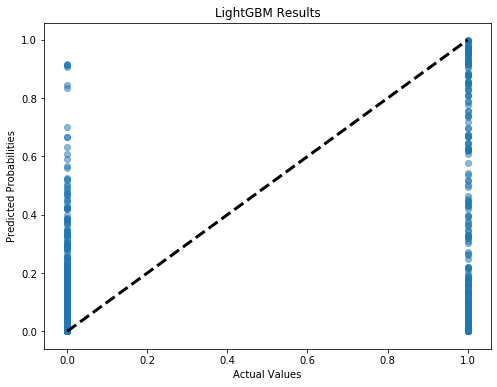

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Separate the target variable from the features
X = training_data.drop(['target', 'positions', 'Unnamed: 0', 'volatility_scores', 'piecevalues', 'elo'], axis=1)
y = training_data['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Create and fit the LightGBM model
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 100,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

model = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=lgb_test, early_stopping_rounds=5)

# Make predictions on the test set
y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)

# Plot the predicted probabilities against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Probabilities')
plt.title('LightGBM Results')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on the test set
y_pred = model.predict(X_test)

sorted_indices = np.argsort(-y_pred_proba)
sorted_pred = y_pred[sorted_indices]

def p_top_k(k):
    ptopk = np.array(y_test)[sorted_indices[:k]]
    print(f"Precision @ top {k}: {sum(ptopk)/k}")
    
p_top_k(50)
p_top_k(100)
p_top_k(sum(y_test))
p_top_k(1000)


Precision @ top 50: 0.92
Precision @ top 100: 0.86
Precision @ top 262: 0.5190839694656488
Precision @ top 1000: 0.207
